# Air Distribution



Step 1: Define the Healthy Ranges
We've already defined the healthy ranges for various parameters in the introduction. For our simulation, we'll focus on the "Air distribution (Air velocity)" pillar since you mentioned [Air Circulation]. Here's the healthy range for air velocity:

Air distribution (Air velocity): 0.5-1.5 m/s

## Step 2: Create the Simulator
Firstly, let's import the necessary libraries and define the base class IoTDevice as given above.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining the base class for the IoTDevice
class IoTDevice:
    """
    Represents a base class for an IoT device responsible for monitoring plant conditions.
    
    Attributes:
    - device_id (str): Unique identifier for the device.
    - location (str): Location where the device is placed.
    - telemetry_data (dict): Stores the telemetry data of the device.
    - status (str): Represents the connectivity status of the device. Can be 'online' or 'offline'.
    """
    def __init__(self, device_id, location):
        """
        Initializes the IoTDevice with a device ID and location.
        
        Args:
        - device_id (str): Unique identifier for the device.
        - location (str): Location where the device is placed.
        """
        self.device_id = device_id
        self.location = location
        self.telemetry_data = {}
        self.status = "offline"
    
    def connect(self):
        """
        Connects the device, changing its status to 'online'.
        """
        self.status = "online"
    
    def disconnect(self):
        """
        Disconnects the device, changing its status to 'offline'.
        """
        self.status = "offline"
    
    def send_telemetry(self, data):
        """
        Sends telemetry data from the device, typically to an external server or database.
        
        Args:
        - data (dict): Telemetry data to be sent.
        
        Note: 
        Actual logic to send telemetry data (e.g., via MQTT) should be implemented.
        """
        # Logic to send telemetry data, e.g., via MQTT
        pass
        
    def simulate_telemetry(self):
        """
        Simulates telemetry data for the device. 
        This method can be overridden by subclasses to provide specific simulation logic.
        """
        # Base simulation logic (can be overridden by subclasses)
        pass

# Feedback message
"Base IoTDevice class defined successfully."


'Base IoTDevice class defined successfully.'

Now, we'll create a subclass for the Air Circulation IoT device. This subclass will have a specific simulate_telemetry method for generating air velocity data.

For our simulation:

We'll generate data that stays mostly within the "healthy" range (0.5 - 1.5 m/s).
Occasionally, we'll introduce "unhealthy" values to show variability.

In [17]:
class AirCirculationDevice(IoTDevice):
    """
    Represents a specialized IoT device for monitoring air circulation (air velocity).
    
    This class extends the IoTDevice class and provides specific simulation logic 
    for air velocity telemetry.
    """
    
    def __init__(self, device_id, location):
        super().__init__(device_id, location)
    
    def simulate_telemetry(self, size=100):
        """
        Simulates telemetry data for air velocity. 
        
        Args:
        - size (int): Number of data points to generate.
        
        Returns:
        - numpy array: Array containing the simulated air velocity data.
        """
        # Air velocity healthy range values
        velocity_healthy_mean = 1.0  # Central value of the healthy range
        velocity_healthy_std_dev = 0.25  # Adjust for desired fluctuation

        # Generate healthy data
        velocity_healthy_data = np.random.normal(velocity_healthy_mean, velocity_healthy_std_dev, size)

        # Introduce some unhealthy data
        velocity_unhealthy_data = np.array([0.2, 0.3, 1.8, 1.9, 2.0])
        velocity_data = np.insert(velocity_healthy_data, [20, 40, 60, 80, 90], velocity_unhealthy_data)
        
        return velocity_data

# Create an instance of the AirCirculationDevice and generate sample telemetry data
air_device = AirCirculationDevice(device_id="ACD123", location="Greenhouse A")
sample_data = air_device.simulate_telemetry()

# Feedback message
"AirCirculationDevice subclass defined and sample telemetry data generated successfully."


'AirCirculationDevice subclass defined and sample telemetry data generated successfully.'

Now that we have our air velocity data simulated, we can proceed to Step 3 and plot this data for your Jupyter notebook demonstration.

We'll use matplotlib to visualize the air velocity data. Out-of-range values will be highlighted with a different color to distinguish them from the healthy range values.

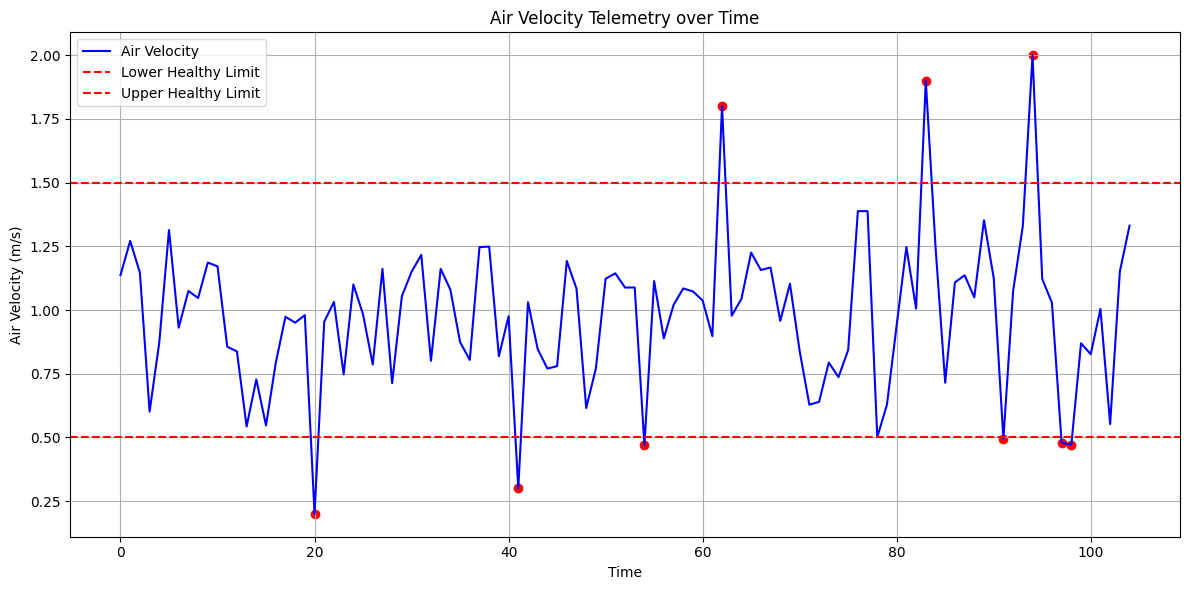

In [18]:
# Plotting the simulated air velocity data
plt.figure(figsize=(12, 6))
plt.plot(sample_data, label="Air Velocity", color='blue')
plt.axhline(y=0.5, color='r', linestyle='--', label="Lower Healthy Limit")
plt.axhline(y=1.5, color='r', linestyle='--', label="Upper Healthy Limit")

# Highlighting the out-of-range values
for index, value in enumerate(sample_data):
    if value < 0.5 or value > 1.5:
        plt.scatter(index, value, color='red')

plt.title("Air Velocity Telemetry over Time")
plt.ylabel("Air Velocity (m/s)")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Here's the air velocity telemetry plot:

The blue line represents the air velocity data over time.
The red dashed lines indicate the lower and upper bounds of the healthy range (0.5 m/s and 1.5 m/s, respectively).
The red dots highlight values that fall outside the healthy range, indicating periods where the air circulation was not ideal.

Step 4: Explanation & Analysis
1. The Importance of the Parameter:
Air velocity (often referring to air circulation) is crucial for cannabis cultivation. Proper air movement ensures that plants receive enough carbon dioxide for photosynthesis, helps in regulating temperature and humidity, and can prevent the buildup of mold and other pathogens.

2. How deviations from the "healthy" range could impact the plant:
Air velocities below the healthy range can lead to insufficient carbon dioxide supply, making plants more susceptible to diseases due to stagnant air. On the other hand, very high air velocities can cause windburn, physical damage to the plants, or excessive transpiration rates.

3. Potential reasons for the deviation and corrective actions:
Deviations can be due to malfunctioning fans, incorrect fan speeds, or environmental factors like sudden gusts in open greenhouses. Corrective actions might include adjusting fan settings, regular maintenance checks, or repositioning plants and equipment to ensure uniform air distribution.

This approach provides a clear visualization of the importance of maintaining proper air velocity in a cannabis cultivation environment and the potential risks associated with deviations from the ideal range.